# **Analysis of the Titanic Dataset**

![](https://cdn.pixabay.com/photo/2021/03/04/16/32/ship-6068668_1280.png)

Data Dictionary:


1.	'Survival': 0 = No, 1 = Yes
2.	'Pclass': Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
3.	'Sex': Sex
4.	'Age': Age in years
5.	'SibSp':  siblings/spouses aboard
6.	'Parch':  parents/children aboard
7.	'Ticket': Ticket number
8.	'Fare': Passenger fare
9.	'Cabin': Cabin number
10.	'Embarked': Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


The data has been split into two groups:
1.	training set (train.csv)
2.	test set     (test.csv (without output (Survived)))
3.  test set output (Survived) given in this csv file (gender_submission.csv)

## 1. An overview of the given Dataset including the Dataset Characteristics and Exploratory Data Analysis, data preprocessing and performance of different ML models.

**Titanic Dataset:**
In this section, we are working with the Titanic dataset, analyzing and preprocessing the data, and evaluating its performance with different Machine Learning models. The dataset consists of three types of data: 'train_data' (891 rows × 12 columns), 'test_data' (418 rows × 11 columns), and 'gender_data' (418 rows × 2 columns).

These datasets have too many missing values, which creates bias and that is not good for the machine learning model. The results of a machine learning model trained on this dataset may not accurately reflect the real-world phenomena being studied. The highest percentage of missing data in this dataset is in the Cabin and Age columns. We tried to reduce the bias to improve our data analysis. We replaced the missing data for 'Age' with the median and drop the 'Cabin' column.

We also used the correlation matrix to observe the relationship between the variables. From the correlation matrix, we see that the highest positive correlation is between Survived and Gender (Sex_Number).

We compare the data using box plots, pie charts, bar charts, etc. to determine who survived or not. We use different categories such as AGE, male vs female, survival for each ticket class, parents vs children, siblings or spouses, etc. Then, we trained machine learning models based on the Titanic dataset.

The 'train_data' dataset includes variables such as PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, and Embarked, which are useful for machine learning models.

Finally, we performed logistic regression with default parameters and with different parameters. We changed the parameters for better performance and evaluated the performance of logistic regression models with different parameters on the Titanic dataset.

**Advertising Dataset:**
Similarly, we are working on the Advertising dataset, analyzing and preprocessing the data and evaluating its performance with different Machine Learning models. We also perform the same type of analysis as we did for the Titanic dataset. We identify any missing or duplicate values and visualize missing values. However, in this dataset, there are no missing or duplicate values.

We also identify a correlation matrix and find that TV advertising spending has a strong positive correlation with sales, followed by radio advertising spending and newspaper advertising spending. We compare the data using box plots, pie charts, bar charts etc.

We use linear regression with default parameters and with two  different parameters. We trained these three models and checked the performance for this dataset.

## 2.	Dataset Characteristics and Exploratory Data Analysis

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
gender_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/gender_submission.csv")

In [ ]:
display('Train Data:',train_data.head(), 'Test Data:',test_data.head(), 'Gender Data:',gender_data.head())

'Train Data:'

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


'Test Data:'

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


'Gender Data:'

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
# Merging gender table and test table to dataframe 'gender_test'
left = gender_data
right = test_data

gender_test = pd.merge(left, right, on=["PassengerId"])
gender_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
# Merging the created dataframe 'gender_test' to the existing dataframe 'train_data'
df = pd.concat([train_data, gender_test])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Show all column names
# Code Here
print(*df.columns, sep = ', ')

PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked


In [ ]:
# Overview about Columns, Range, Non-Null Value Counts, Memory Usage and Data Types (#df.dtpyes)
# Code Here
df.info()

print('\nOverview about Columns:')
print(df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB

Overview about Columns:
              count        mean         std   min       25%       50%  \
PassengerId  1309.0  655.000000  378.020061  1.00  328.0000  655.0000   
Survived     1309.0    0.377387    0.484918  0.00    0.0000    0.0000  

In [ ]:
# Count rows and coulums

rows, cols = df.shape
print(f'Rows: {rows}')
print(f'Columns: {cols}')

Rows: 1309
Columns: 12


In [ ]:
# Total cells in the dataset

print(f'Total cells: {rows * cols}')

Total cells: 15708


### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
"""
We first use the duplicated() method to create a boolean mask that is True for
each row that is a duplicate of a previous row.
We then use boolean indexing to select the rows that correspond to the True
values in the boolean mask, which are the duplicate rows.
Finally, we print the duplicate rows using the print() function.
"""
duplicates = df[df.duplicated()]
print(f'Number of duplicates: {duplicates.shape[0]}')

#The following dataset has no dublicates hence no output.

Number of duplicates: 0


#### Identifying missing values


In [ ]:
# Find the amount of missing values in each column

"""
To find the amount of missing values in each column of a pandas dataframe,
we can use the isna() method to create a boolean mask that is True where the
values are missing, and False otherwise. Then we can use the sum() method on
this boolean mask to count the number of True values in each column.
"""

missing_values = df.isna().sum()

"""
To print only the columns that have missing values in a pandas dataframe,
we can modify the previous example to select only the columns that have
at least one missing value using boolean indexing.

To print both the column names and their corresponding missing value counts
in a pandas dataframe, we can modify the previous example to print the
output as a dataframe using the loc[] method.
"""

print(missing_values.loc[missing_values > 0])

Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64


In [ ]:
# Calculating the percentage of missing values:
mis_per = (missing_values / len(df)) * 100

# Making a table
mis_table = pd.concat([missing_values, mis_per.round(2)], axis = 1)

# Renaming the columns
mis_table_ren = mis_table.rename(columns = {0 : 'Missing Values', 1 : 'Percentage of Total Values'})

print(mis_table_ren.loc[mis_per > 0])

          Missing Values  Percentage of Total Values
Age                  263                       20.09
Fare                   1                        0.08
Cabin               1014                       77.46
Embarked               2                        0.15


#### Visualisation of missing data


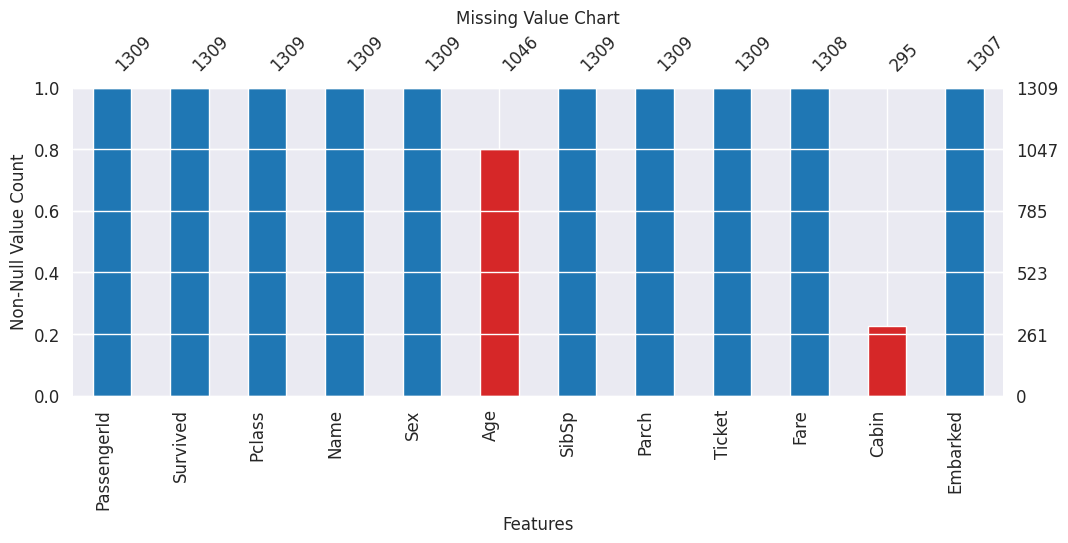

In [ ]:
import missingno as msno

mask = df.count() >= len(df) * 0.99
colors = np.where(mask, 'tab:blue', 'tab:red')

fig, ax = plt.subplots(figsize=(12, 4))
msno.bar(df, ax = ax, fontsize = 12, color = colors)
ax.set_xlabel('Features', fontsize=12)
ax.set_ylabel('Non-Null Value Count', fontsize = 12)
ax.set_title('Missing Value Chart', fontsize = 12)
ax.set_xticklabels(df.columns, rotation = 90)
plt.show()

#### Dealing with missing values.




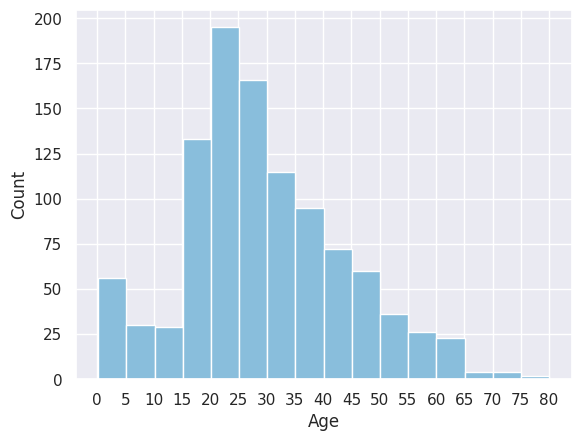

In [ ]:
colors = sns.color_palette('Blues')

plt.hist(df['Age'], bins = 16, color = colors[2])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(0, 85, 5))
plt.show()

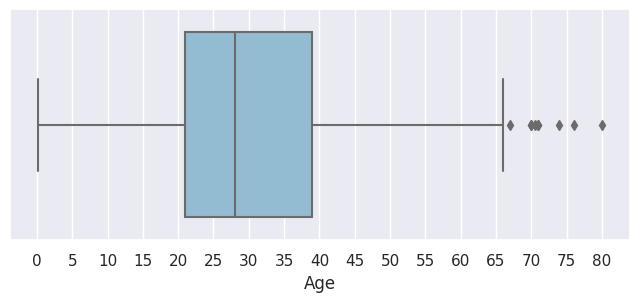

In [ ]:
plt.figure(figsize = (8,3))
sns.boxplot(x = df['Age'], color = colors[2])
plt.xlabel('Age')
plt.xticks(np.arange(0, 85, 5))
plt.show()

In [ ]:
# Calculating median and replacing missing values in 'Age' column with median
age_median = df['Age'].median()
df['Age'].fillna(age_median, inplace = True)

# Checking number of missing values
df['Age'].isna().sum()

0

In [ ]:
# Calculating mean and replacing missing values in 'Fare' column with mean
fare_mean = df['Fare'].mean()
df['Fare'].fillna(fare_mean, inplace = True)

df['Fare'].isna().sum()

0

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

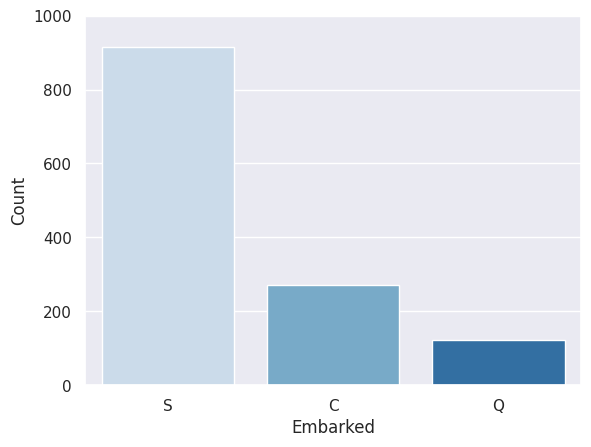

In [ ]:
palette = sns.color_palette('Blues', 3)

# Creating a bar plot of 'Embarked'
sns.countplot(x = 'Embarked', data = df, palette = palette)
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.yticks(np.arange(0, 1200, 200))
plt.show()

In [ ]:
# Replacing missing values in 'Embarked' column with mode as the plot shows there are too many 'S'
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

df['Embarked'].isna().sum()

0

In [ ]:
# Dropping 'Cabin' column as it has too many missing values
df.drop(columns = ['Cabin'], inplace = True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S


 ##### Findings

- For 'Age' column, there are 263 missing values. First, we visualize the distribution of 'Age' using a histogram. The histogram shows that passenger's age is roughly normally distributed with a peak around 20-25 years. Now we make a boxplot of 'Age' column to understand the five values. They are the min, first quartile, median, third quartile, and the max. The median age is 28.0. Now we fill the missing values using the fillna() method with a value of median age of the passengers as median is not influenced by the outliers of the variable.

- For 'Fare' column, there is only 1 missing value. We can fill this value using the mean fare of the passengers.

- For 'Embarked' column, there are 2 missing values. First, we get the unique values of 'Embarked' column. Now we visualize the 'Embarked' variable, which is a categorical variable using a bar plot to show the frequency of each category. This will help us understand the distribution of passengers who embarked from each port. The plot shows that there are too many 'S' in the dataset. So, we can fill these values using the mode value of the variable.

- For 'Cabin' column, there are 1014 missing values which is almost 80% of the data. It might not be meaningful to fill these empty cells with any estimate. So, a better strategy might be to drop this variable from the analysis.

### 2.3 Analysing Patterns using Visualisations

The data type of 'Sex' is an object, which will not be visible in a correlation. So, if we like to include the values of the column 'Sex' into the correlation matrix by creating a new column 'Sex_Number' and set the value 'female' to '1' and 'male' to '0'.

In [ ]:
# Creating a new column 'SexNo' with the values '1' for 'female' and '0' for 'male'
df['Sex_Number'] = np.where((df['Sex'] == "female"), 1, 0)
# Checking if the column 'SexNo' has been added
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


#### 2.3.1 Visualization of column correlation (use groupby). Also, plot Heat Map

In [ ]:
# Correlation table including the new column 'SexNo'
correlation = df.corr()
correlation

<ipython-input-24-8a10b226dc37>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_Number
PassengerId,1.000000,-0.020370,-0.038354,0.025799,-0.055224,0.008942,0.031416,-0.013406
Survived,-0.020370,1.000000,-0.264710,-0.043286,0.002370,0.108919,0.233568,0.688371
Pclass,-0.038354,-0.264710,1.000000,-0.377908,0.060832,0.018322,-0.558477,-0.124617
Age,0.025799,-0.043286,-0.377908,1.000000,-0.189972,-0.125851,0.178860,-0.053663
SibSp,-0.055224,0.002370,0.060832,-0.189972,1.000000,0.373587,0.160224,0.109609
Parch,0.008942,0.108919,0.018322,-0.125851,0.373587,1.000000,0.221522,0.213125
Fare,0.031416,0.233568,-0.558477,0.178860,0.160224,0.221522,1.000000,0.185484
Sex_Number,-0.013406,0.688371,-0.124617,-0.053663,0.109609,0.213125,0.185484,1.000000


Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

**seaborn.heatmap**

Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the currently-active Axes if none is provided to the ax argument. Part of this Axes space will be taken and used to plot a colormap, unless cbar is False or a separate Axes is provided to cbar_ax.

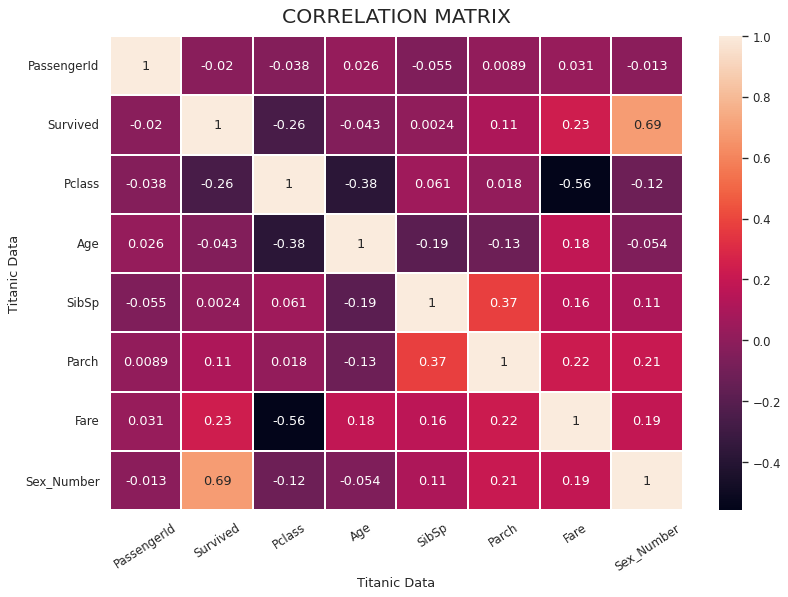

In [ ]:
# Visualisation of the corralation table

plt.figure(figsize=(12,8), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Titanic Data')
plt.ylabel('Titanic Data')
plt.xticks(rotation=33)
plt.show()

Some observations from the correlation matrix are:

1. The highest positive correlation is between Survived and Gender (Sex_Number) with a coefficient of 0.69. This suggests that there is a moderate positive relationship between being female and surviving the Titanic disaster.

2. Pclass has a moderate negative correlation with Survived with a coefficient of -0.26. This suggests that passengers in higher class (lower values of Pclass) had a higher chance of survival.

3. There is a moderate negative correlation between Pclass and Fare, with a coefficient of -0.56. This suggests that passengers in higher class paid more for their tickets.

4. There is a small negative correlation between Age and Pclass, with a coefficient of -0.38. This suggests that passengers in higher class tended to be younger.

5. There is a small negative correlation between Age and SibSp, with a coefficient of -0.19. This suggests that passengers with siblings or spouses tended to be younger.

6. There is a small positive correlation between Fare and Survived, with a coefficient of 0.23. This suggests that passengers who paid more for their tickets had a higher chance of survival.

7. There is a small positive correlation between SibSp and Parch, with a coefficient of 0.37. This suggests that passengers with more siblings or spouses tended to have more parents or children on board.

#### 2.3.2 Visualization of column relationships (Categorical Variables)

##### 2.3.2.1 Sex Proportion

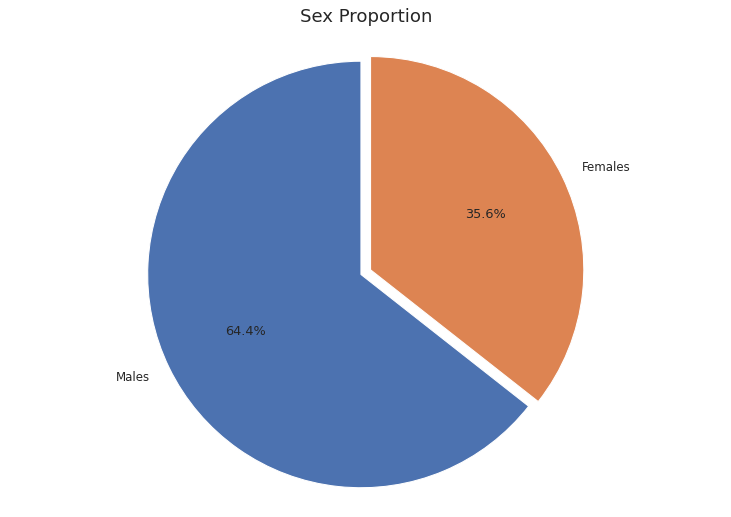

In [ ]:
male = (df['Sex'] == 'male').sum()
female = (df['Sex'] == 'female').sum()
proportions = [male, female]

plt.figure(figsize=(12,8), dpi=77)
plt.pie(proportions, data=df, labels = ['Males', 'Females'], explode = (0.05,0), startangle=90, autopct='%1.1f%%', shadow=False)
plt.axis('equal')
plt.title("Sex Proportion", size=17, pad=13)
plt.show()

The pie chart visualizes the sex proportion of the Titanic dataset. It shows that there were about 64.4% of males and about 35.6% of females on the ship.

We can see that the number of females were lower than the number of males on the ship.

##### 2.3.2.2 Age comparision of the people who survived and those who died

In [ ]:
# How many people survived ('Survived' == 0)???
survived_data=df.Survived.value_counts().to_frame()
survived_data

,Survived
0,815
1,494


In [ ]:
pd.pivot_table(df, index="Survived", values=['Pclass','SibSp', 'Parch', 'Fare'])

,Fare,Parch,Pclass,SibSp
Survived,,,,
0,23.890678,0.311656,2.467485,0.496933
1,48.811497,0.506073,2.010121,0.502024


In [ ]:
# Amount and average age of people who survived compared to those who died.
df.groupby(['Survived']).Age.agg([len,min, max,'mean', 'median'])

,len,min,max,mean,median
Survived,,,,,
0,815,0.33,74.0,29.937926,28.0
1,494,0.17,80.0,28.785951,28.0


In [ ]:
fem_p1_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
fem_p1_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
fem_p1_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
fem_p1_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
fem_p2_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
fem_p2_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
fem_p2_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
fem_p2_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 2) & (df.SibSp == 3)].Age.median()
fem_p3_s0 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
fem_p3_s1 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
fem_p3_s2 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
fem_p3_s3 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
fem_p3_s4 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
fem_p3_s5 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
fem_p3_s8 =df.loc[(df.Sex == 'female') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()
male_p1_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 0)].Age.median()
male_p1_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 1)].Age.median()
male_p1_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 2)].Age.median()
male_p1_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 1) & (df.SibSp == 3)].Age.median()
male_p2_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 0)].Age.median()
male_p2_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 1)].Age.median()
male_p2_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 2) & (df.SibSp == 2)].Age.median()
male_p3_s0 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 0)].Age.median()
male_p3_s1 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 1)].Age.median()
male_p3_s2 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 2)].Age.median()
male_p3_s3 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 3)].Age.median()
male_p3_s4 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 4)].Age.median()
male_p3_s5 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 5)].Age.median()
male_p3_s6 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 6)].Age.median()
male_p3_s8 =df.loc[(df.Sex == 'male') & (df.Pclass == 3) & (df.SibSp == 8)].Age.median()

# Filling missing values with average age of women and men in each class
def myfunc(age, pclass, sex, SibSp):
    if pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 0:
        age=fem_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 1:
        age=fem_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 2:
        age=fem_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'female' and SibSp == 3:
        age=fem_p1_s3
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 0:
        age=fem_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 1:
        age=fem_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 2:
        age=fem_p2_s2
    elif pd.isnull(age) and pclass==2 and sex == 'female' and SibSp == 3:
        age=fem_p2_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 0:
        age=fem_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 1:
        age=fem_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 2:
        age=fem_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 3:
        age=fem_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 4:
        age=fem_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 5:
        age=fem_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'female' and SibSp == 8:
        age=df.Age.median()
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 0:
        age=male_p1_s0
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 1:
        age=male_p1_s1
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 2:
        age=male_p1_s2
    elif pd.isnull(age) and pclass==1 and sex == 'male' and SibSp == 3:
        age=male_p1_s3
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 0:
        age=male_p2_s0
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 1:
        age=male_p2_s1
    elif pd.isnull(age) and pclass==2 and sex == 'male' and SibSp == 2:
        age=male_p2_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 0:
        age=male_p3_s0
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 1:
        age=male_p3_s1
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 2:
        age=male_p3_s2
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 3:
        age=male_p3_s3
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 4:
        age=male_p3_s4
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 5:
        age=male_p3_s5
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 6:
        age=male_p3_s6
    elif pd.isnull(age) and pclass==3 and sex == 'male' and SibSp == 8:
        age=male_p3_s8
    else:
        age=age
    return age

In [ ]:
# Creating a new columns 'Age_Filled_Na' with the new average age values
df['Age_Filled'] = df.apply(lambda x: myfunc(x['Age'], x['Pclass'], x['Sex'], x['SibSp']), axis=1)

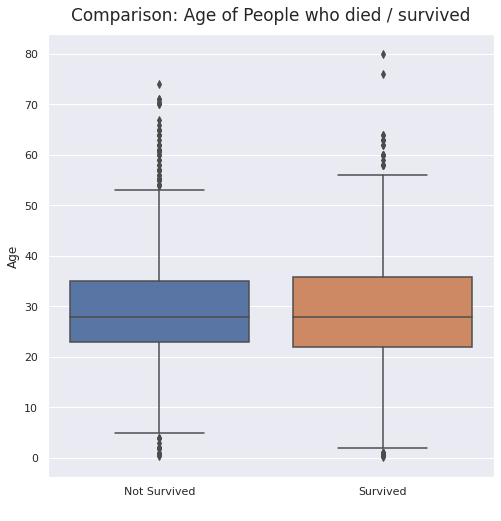

In [ ]:
# Age comparision of the people who survived and those who died using a boxplot.
plt.figure(figsize=(8,8), dpi=72)
sns.boxplot(x="Survived", y="Age_Filled", data=df)
plt.title("Comparison: Age of People who died / survived", size=17, pad=13)
plt.ylabel('Age')
plt.xlabel(' ')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()

- From the first table we can see that about 815 passengers did not survive and about 494 passengers survived in the Titanic disaster.

- The second table with 'Fare', 'Parch', 'Pclass', 'Sibsp' shows the mean values of corresponding variable of survived and not survived.

- The third table shows the minimum, maximum, the mean and median age for survived and not survived.

- This plot shows the comparison of the two groups and discover any differences or similarities in age between passengers who survived and those who did not. The median age of both the passenger's who survived and did not survived is 28. In the category of 'survived' travelers, there are extreme values (older passengers) but 'not survived' category has more outliers than 'survived' category.

Overall, the comparison shows that age may have had a significant impact on the Titanic disaster's survival rates. Older passengers were more likely to pass away, while younger passengers had a better chance of surviving.

##### 2.3.2.3 The barplot compares the survival

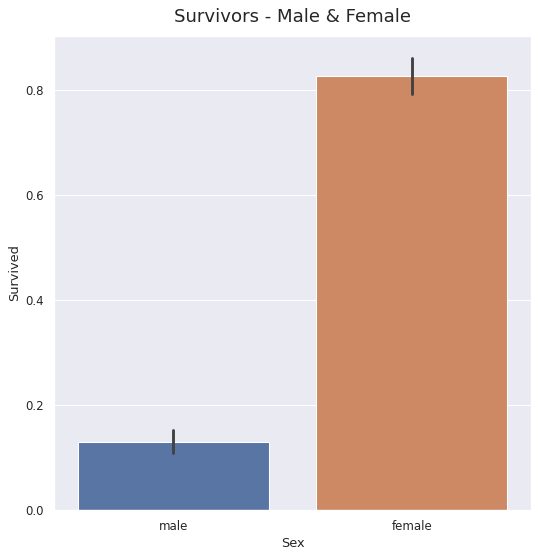

In [ ]:
plt.figure(figsize=(8,8), dpi=77)
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survivors - Male & Female", size=17, pad=13 )
plt.show()

This bar plot shows comparison of the survival rates between male and female passengers on the Titanic dataset and identify any differences or similarities in survival rates on the basis of sex. According to the dataset, a lower percentage of male passengers survived the Titanic disaster compared to female passengers. About 82.62% of female passengers survived, on the other hand, only about 12.93% of male passengers survived.

It shows that sex may have been an important factor in determining survival during the Titanic disaster.

##### 2.3.2.4 Comparison: Survivors - Male & Female

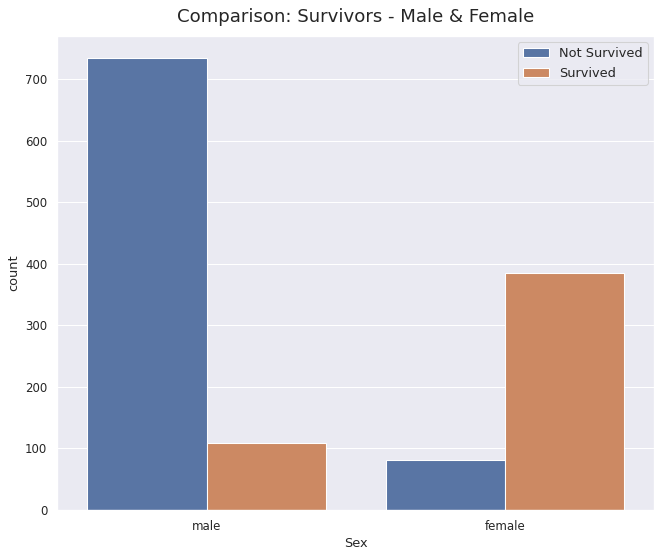

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Sex'],hue=df['Survived'])
plt.title("Comparison: Survivors - Male & Female", size=17, pad= 13)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In this Titanic dataset, there were 843 male passengers and 466 female passengers. Among the male passengers, 109 survived while among the female passengers, 385 survived. Percentage of women who survived is 82.62% which is more than the percentage of men who survived that is 12.93%

We can see from the plot that the majority of male passengers did not survive, while the majority of female passengers did survive. This reinforces the previous observation that sex was an important factor in determining survival during the Titanic disaster.

In [ ]:
# Find percentage of women who survived

women = df[df['Sex'] == 'female']
survived_women = women[women['Survived'] == 1]
percentage = len(survived_women) / len(women)
print(f'Percentage of women who survived: {percentage:.2%}')

Percentage of women who survived: 82.62%


In [ ]:
# Find percentage of men who survived

men = df[df['Sex'] == 'male']
survived_men = men[men['Survived'] == 1]
percentage = len(survived_men) / len(men)
print(f'Percentage of men who survived: {percentage:.2%}')

Percentage of men who survived: 12.93%


##### 2.3.2.5 Compares the chance of survival for each ticket class

In [ ]:
df['Pclass'].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [ ]:
df.groupby(['Pclass', 'Survived']).Age.agg([len])

len
Pclass Survived     
1      0         137
       1         186
2      0         160
       1         117
3      0         518
       1         191

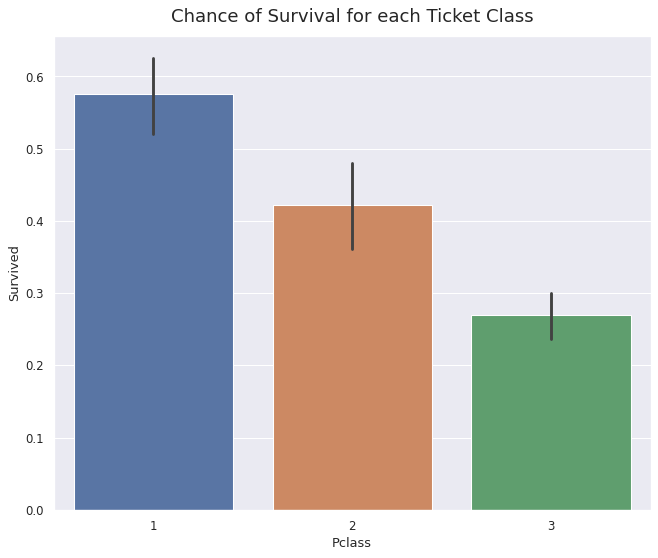

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Chance of Survival for each Ticket Class", size=17, pad=13)
plt.show()

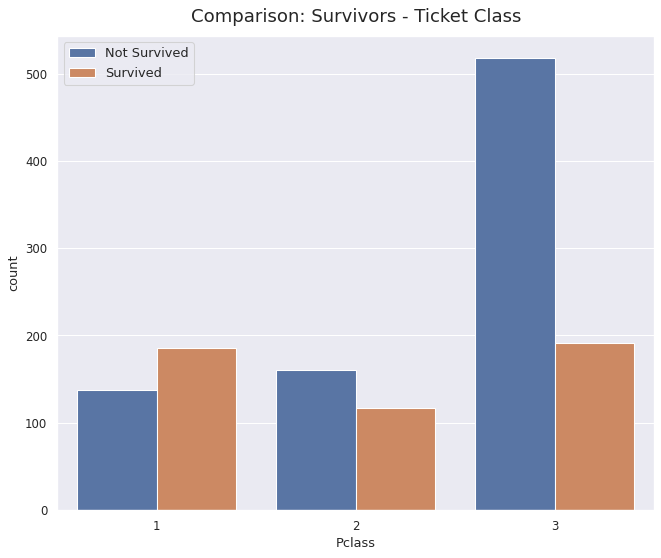

In [ ]:
# Survived and not survived compared for each ticket class
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Pclass'],hue=df['Survived'])
plt.title("Comparison: Survivors - Ticket Class", size=17, pad=13)
plt.legend(['Not Survived', 'Survived'], loc='upper left', prop={'size': 12})
plt.show()

The analysis compares the chance of survival for each ticket class.

- From the first table, we can observe that the majority of the passengers were in third class (709), followed by first class (323) and then second class (277).

- From the second table, we can say that the first class passengers had a higher chance of survival compared to second and third class passengers.

- The first bar chart showed the percentage of survival based on their class which shows the previous analysis.

- The second bar chart represents the number of passengers who survived and did not survive on the Titanic based on their passenger class. Among the 323 first-class passengers, 186 survived, while 137 did not. Among the second-class passengers, 117 passengers survived and 160 passengers did not survived. Again, among the 709 third-class passengers, only 191 passengers survived, while 518 did not.

We can conclude that first-class passengers had the highest survival rate, while third-class passengers had the lowest survival rate and second-class passengers fell in between.

##### 2.3.2.6 Chance of Survival for Passengers with Parents or Children

In [ ]:
# Amount and average age of women and man of each class who survived compared to those who died.
df.groupby(['Sex','Survived', 'Pclass']).Age.agg([len,min, max,'mean'])

len    min   max       mean
Sex    Survived Pclass                             
female 0        1         3   2.00  50.0  25.666667
                2         6  24.00  57.0  36.000000
                3        72   2.00  48.0  24.805556
       1        1       141  14.00  76.0  36.574468
                2       100   0.92  60.0  27.004200
                3       144   0.17  63.0  23.459514
male   0        1       134   6.00  71.0  40.220149
                2       154   2.00  70.0  32.055195
                3       446   0.33  74.0  26.893296
       1        1        45   0.92  80.0  35.331556
                2        17   0.67  62.0  17.431176
                3        47   0.42  45.0  23.370638

In [ ]:
df['Parch'].value_counts().to_frame()

,Parch
0,1002
1,170
2,113
3,8
5,6
4,6
6,2
9,2


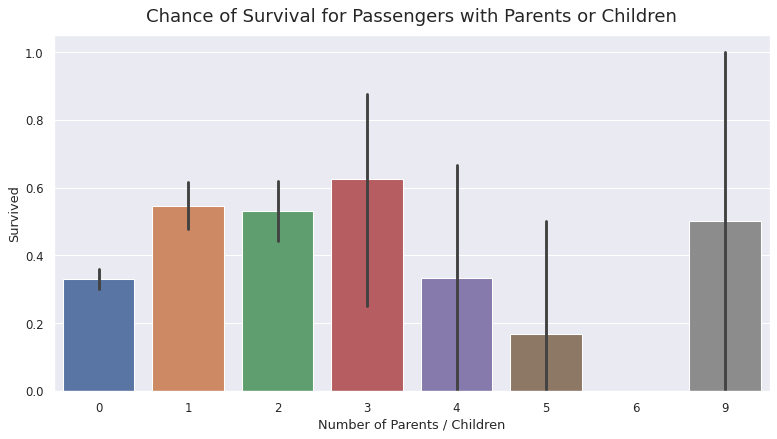

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Parents or Children", size=17, pad=13)
plt.xlabel('Number of Parents / Children')
plt.show()

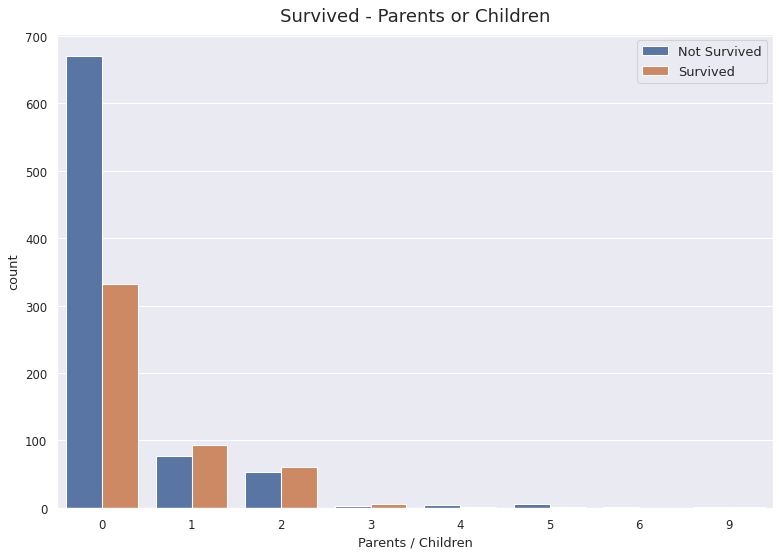

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['Parch'],hue=df['Survived'])
plt.title("Survived - Parents or Children", size=17, pad=12)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xlabel('Parents / Children')
plt.show()

In [ ]:
# Age of people with parents or children
df.groupby(['Parch','Survived']).Age.agg([len, min, max])

len    min   max
Parch Survived                  
0     0         670  11.00  74.0
      1         332   5.00  80.0
1     0          77   0.75  70.0
      1          93   0.42  64.0
2     0          53   0.33  58.0
      1          60   0.17  64.0
3     0           3  16.00  61.0
      1           5  24.00  54.0
4     0           4  29.00  64.0
      1           2  28.00  60.0
5     0           5  39.00  41.0
      1           1  38.00  38.0
6     0           2  40.00  43.0
9     0           1  28.00  28.0
      1           1  28.00  28.0


- The first table shows the amount and average age of women and man of each class who survived compared to those who died. For example, there were 3 female passengers who did not survive and belonged to the first passenger class with maximum age of 50, minimum age of 2 and mean age of 25.67.

- The second table shows the count of passengers by number of parents/children aboard and survival status. For example, there were 1002 passengers with no parents/children.

- From the bar plot, we can see that passengers with a small number of parents or children (0, 1, 2, 3) had a higher chance of survival than those with higher numbers (4, 5, 6).

- The third table data is describing the survival rates of passengers based on the number of parents or children (Parch) they were traveling with. We can see that individuals with no parents or children on board had the highest number of fatalities, with 670 not surviving out of a total of 1002 individuals in the dataset. Again, from passengers with parents or children with a number of 1 to 3 had a higher number of survived passengers than not surviving passengers. From passengers with parents or children with a number of 4 to 5 had a lower number of survived passengers than not survived passengers. The number is equal for Parch = 9.

##### 2.3.2.7 This barplot compares the chance of survival within a category

In [ ]:
df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, 'mean'])

len       mean
SibSp Survived                
0     0         593  30.679865
      1         298  29.383389
1     0         153  32.789216
      1         166  28.744036
2     0          23  24.478261
      1          19  23.868421
3     0          15  15.666667
      1           5  27.600000
4     0          18   7.222222
      1           4  15.750000
5     0           5  10.200000
      1           1  10.000000
8     0           8  26.312500
      1           1  28.000000

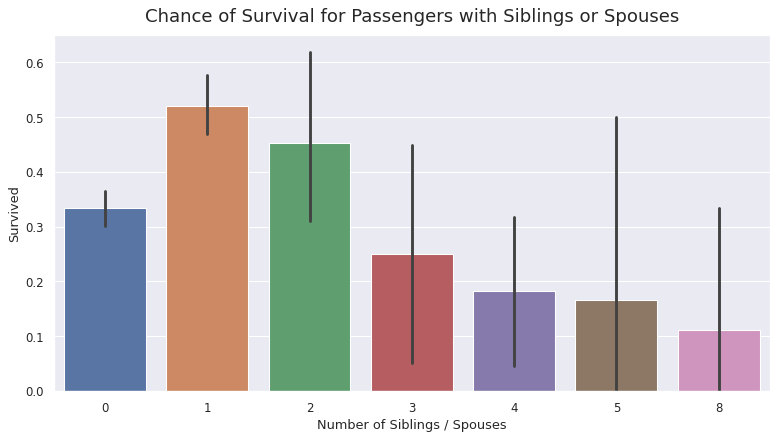

In [ ]:
# This barplot compares the chance of survival within a category
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Survived", data=df)
plt.title("Chance of Survival for Passengers with Siblings or Spouses", size=17, pad=13)
plt.xlabel('Number of Siblings / Spouses')
plt.show()

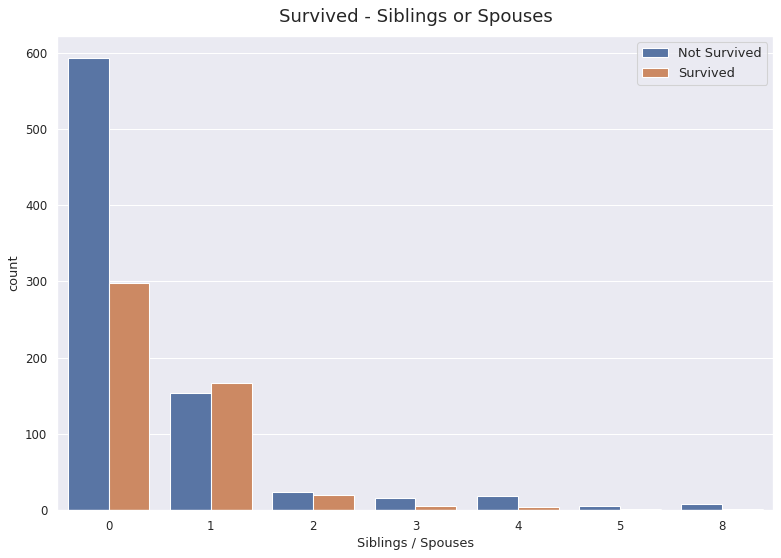

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.countplot(x=df['SibSp'],hue=df['Survived'])
plt.title("Survived - Siblings or Spouses", size=17, pad=13)
plt.xlabel('Siblings / Spouses')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.show()

In [ ]:
df.groupby(['SibSp','Survived']).Age.agg([len, min, max, 'mean'])

len    min   max       mean
SibSp Survived                             
0     0         593   0.33  74.0  30.679865
      1         298   0.42  80.0  29.383389
1     0         153   0.75  70.0  32.789216
      1         166   0.17  76.0  28.744036
2     0          23   9.00  44.0  24.478261
      1          19   0.75  59.0  23.868421
3     0          15   2.00  31.0  15.666667
      1           5  23.00  33.0  27.600000
4     0          18   1.00  16.0   7.222222
      1           4   3.00  38.0  15.750000
5     0           5   1.00  16.0  10.200000
      1           1  10.00  10.0  10.000000
8     0           8  14.50  28.0  26.312500
      1           1  28.00  28.0  28.000000

The analysis shows the survival rate distribution of passengers on the basis of siblings or spouses they had onboard (SibSp).

- From the first table, the data shows the number of passengers by the number of siblings or spouses (SibSp) they had on board. Most passengers had no siblings/spouses with them.

- The second table shows the data of count, mean age of SibSp and survival category. For example, the number of passengers with no siblings or spouses who did not survived is 593 and had an average age of 30.679865.

- The first bar plot shows that passengers with one siblings or spouses had the highest survival rates. The passengers with two siblings or spouses is in the second. The passengers with more siblings or spouses (3, 4, 5, 8) had lower survival rates. The passengers with no siblings or spouses is in between them.

- From the next plot, we can say that the number of passengers who did not survived is higher for all siblings or spouses category except SibSp = 1. The number is much higher for the passengers with no siblings or spouses.

- Similarly, the last table shows the data of count, minimum, maximum and mean age for each category of SibSp and Survived.

From the analysis above, it appears that passengers with fewer siblings or spouses on board had a higher chance of survival than those who are traveling alone. However, the size of the groups and the varying age ranges and mean ages make it difficult to draw definitive conclusions about the relationship between SibSp and survival.

##### 2.3.2.8 Chance of Survival by Port of Embarkation

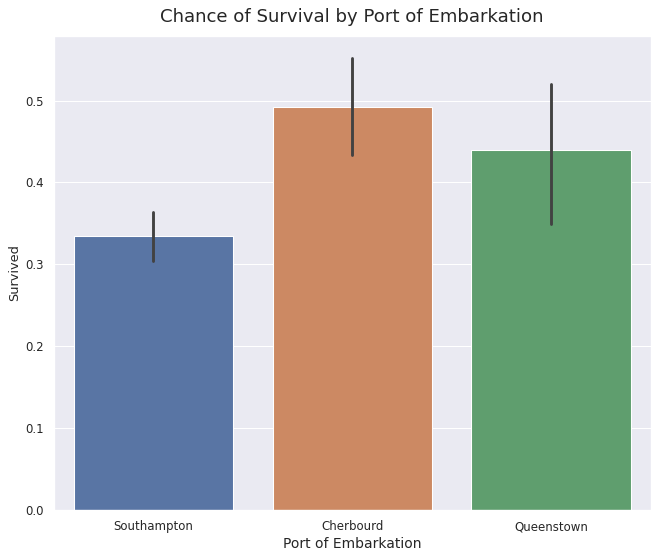

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title('Chance of Survival by Port of Embarkation', size=17, pad=13)
plt.xlabel('Port of Embarkation', size=13)
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

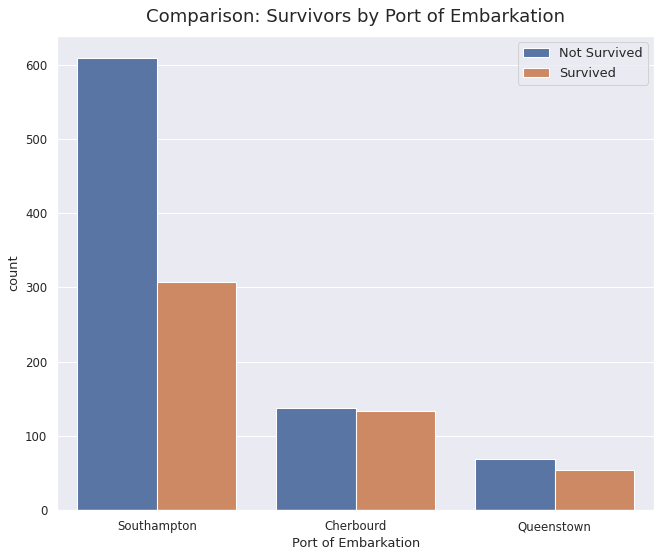

In [ ]:
plt.figure(figsize=(10,8), dpi=77)
sns.countplot(x=df['Embarked'],hue=df['Survived'])
plt.title("Comparison: Survivors by Port of Embarkation", size=17, pad=13)
plt.xlabel('Port of Embarkation')
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 12})
plt.xticks([0, 1, 2],['Southampton', 'Cherbourd', 'Queenstown'])
plt.show()

These plots suggest that the port of embarkation may have had some impact on the chance of survival. Passengers who embarked from Cherbourd having a higher chance of survival compared to those who embarked from Southampton or Queenstown. The embarkation from Southampton had the lowest survival rates despite the fact that the most passengers embarked from the Southampton. However, it is important to note that other factors such as ticket class, age, and gender also have played a role in determining survival rates.

##### 2.3.2.9 Average Age of Passengers with Siblings and  Parents or Children

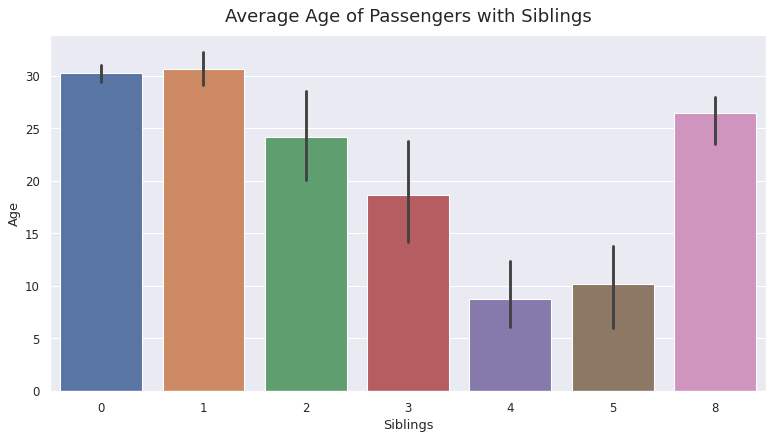

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="SibSp", y="Age", data=df)
plt.title('Average Age of Passengers with Siblings', size=17, pad=13)
plt.xlabel('Siblings')
plt.show()

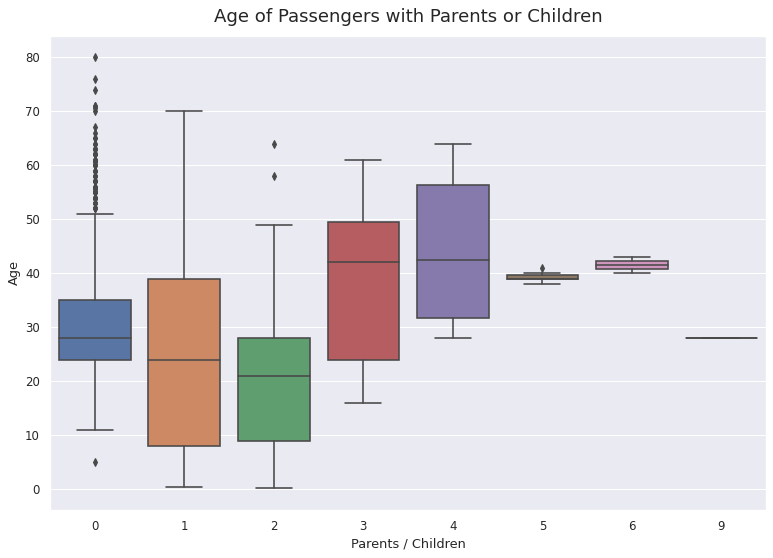

In [ ]:
plt.figure(figsize=(12,8), dpi=77)
sns.boxplot(x="Parch", y="Age", data=df)
plt.title('Age of Passengers with Parents or Children', size=17, pad=13)
plt.xlabel('Parents / Children')
plt.show()

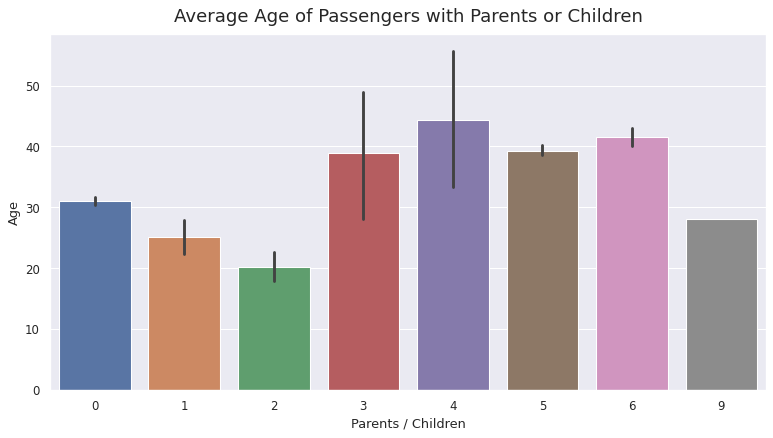

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.barplot(x="Parch", y="Age", data=df)
plt.title('Average Age of Passengers with Parents or Children', size=17, pad=12)
plt.xlabel('Parents / Children')
plt.show()


The analysis shows the average age of passengers with siblings and parents or children.

- For the average age of passengers with a number of siblings, siblings of a number of 0 and 1 had higher average age which is equal to 30 and greater than 30 respectively. On the other hand, siblings of a number of 4 had the lowest average age which is below 10 and the family of 5 siblings had an average age of 10. Siblings with a number of 2, 3, 8 fell in between.

- The boxplots of each category of parents or children shows that passengers with 0 parents or children had more extreme values. The median age is higher for the category of passengers with 3 and 4 parents and children. It shows the relationship between the number of parents or children onboard and the age of the passengers.

- For the average age of passengers with a number of parents or children, the average is higher for parents or children with a number of 4 which is near 45 and the lowest for parents or children with a number of 2 which is 20.

##### 2.3.2.10 Age of Passengers for each Ticket Class

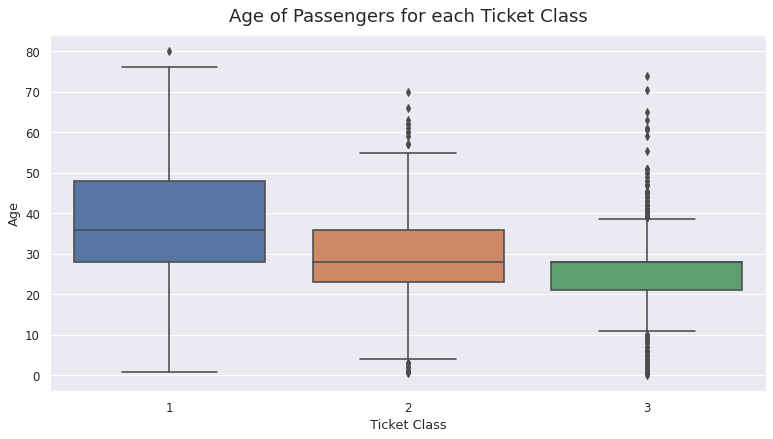

In [ ]:
plt.figure(figsize=(12,6), dpi=77)
sns.boxplot(x="Pclass", y="Age", data=df)
plt.title('Age of Passengers for each Ticket Class', size=17, pad=13)
plt.xlabel('Ticket Class')
plt.show()


We can observe from the plot that there is some variation in the age distribution across different ticket classes. Passengers in first class tend to be older, while passengers in second and third class tend to be younger. Additionally, there are some outliers in each ticket class especially 2nd and 3d class indicating that there were some passengers who were much older or younger. 3rd class passengers had the most outliers and they are mostly the younger passengers among the other classes.

##### 2.3.2.11 Comparing multiple columns

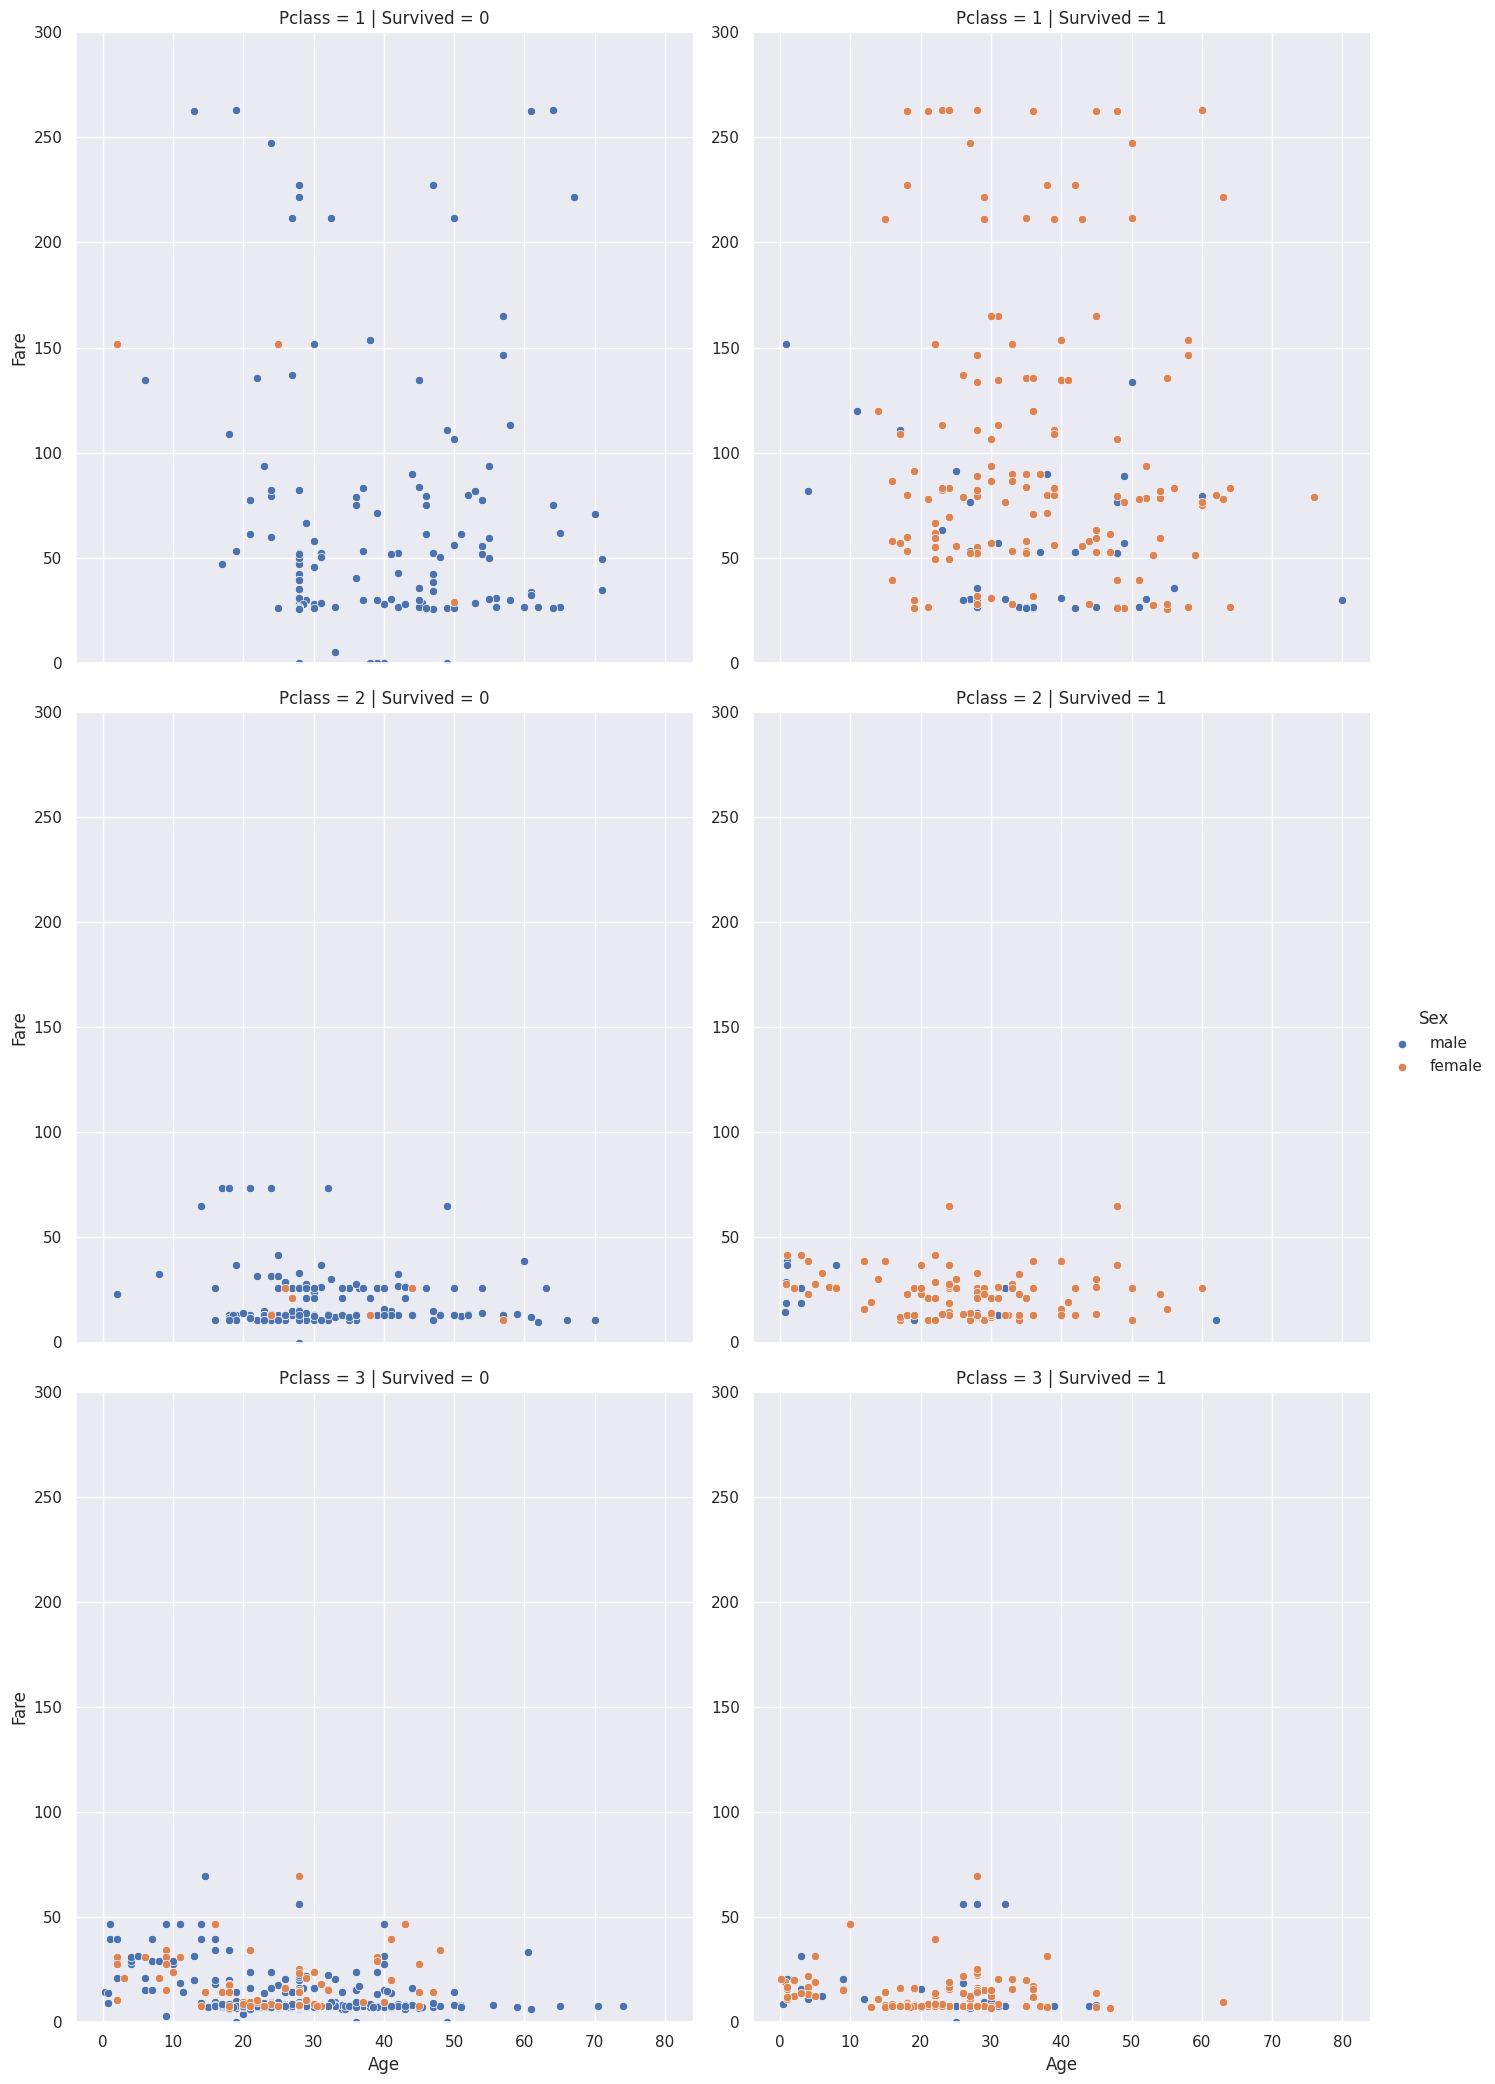

In [ ]:
# Comparison of Pclass, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='Pclass', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

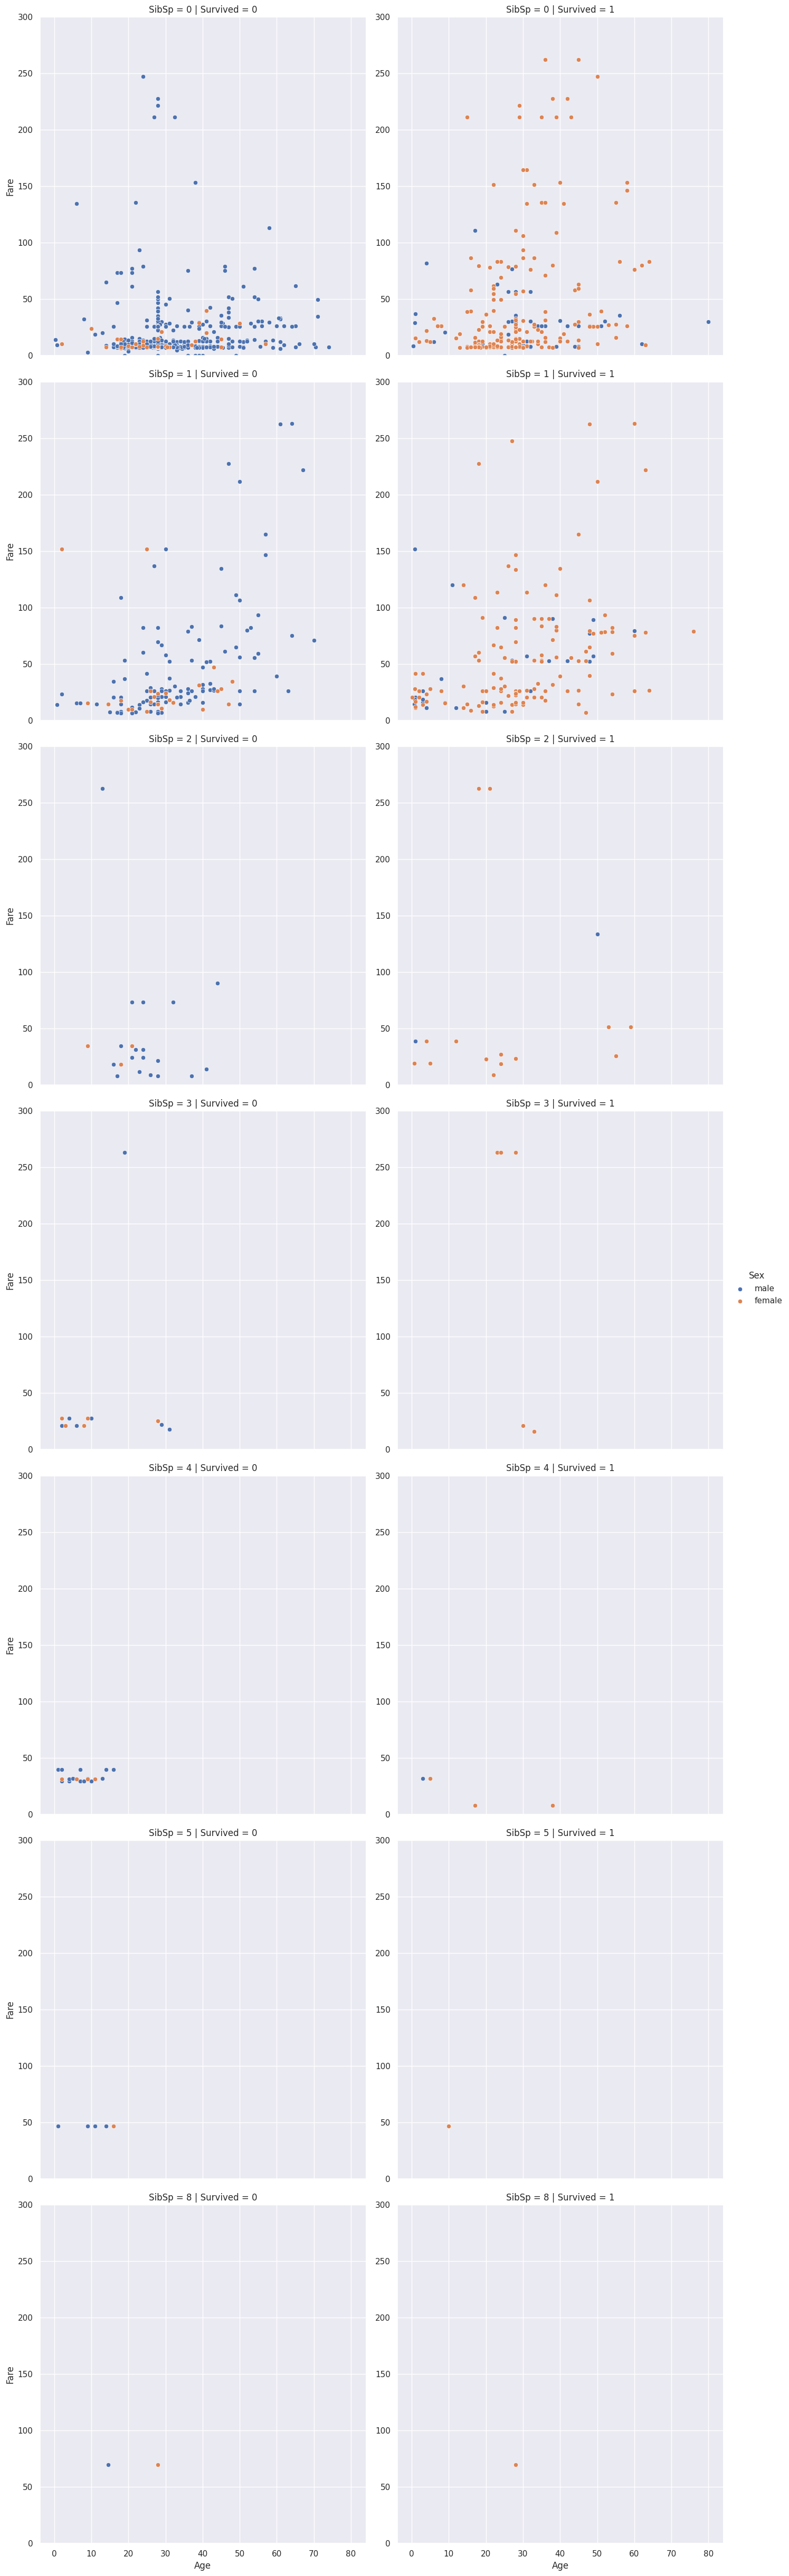

In [ ]:
# Comparison of Parch, Age, Sex and Survivors
g = sns.FacetGrid(df, col='Survived', row='SibSp', sharey=False, ylim=(0,300), hue='Sex', height=7)
g.map_dataframe(sns.scatterplot, x='Age', y='Fare')
g.set_axis_labels('Age', 'Fare')
g.add_legend()
# g.set_titles(col_template='', row_template='')
plt.show()

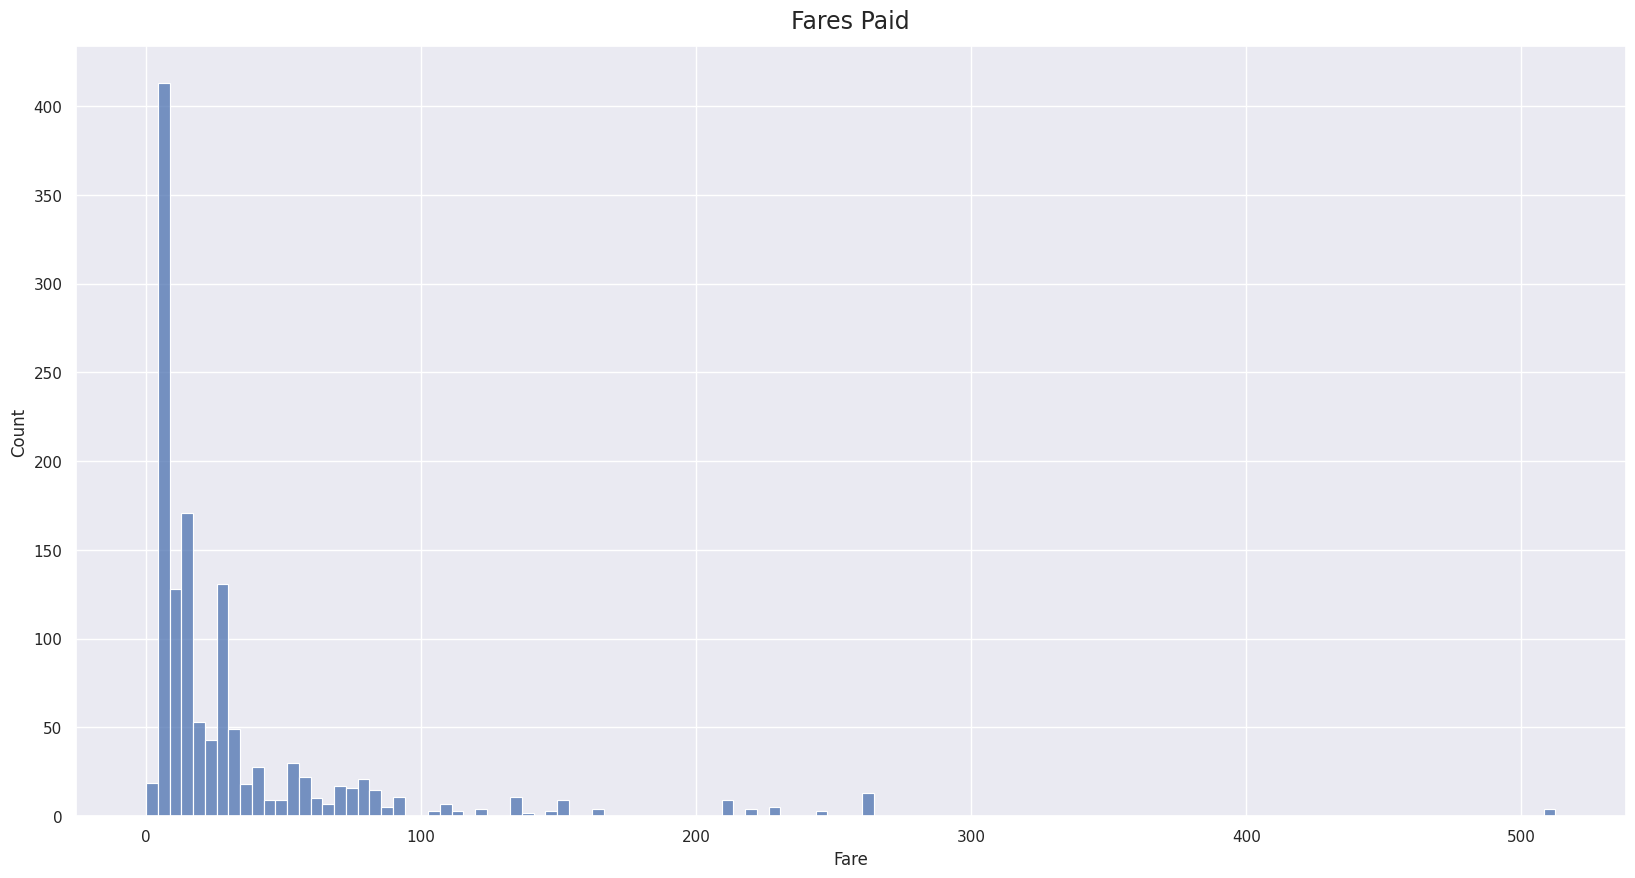

In [ ]:
plt.figure(figsize=(20,10))
sns.histplot(df.Fare)
plt.title('Fares Paid', size=17, pad=13)
plt.show()

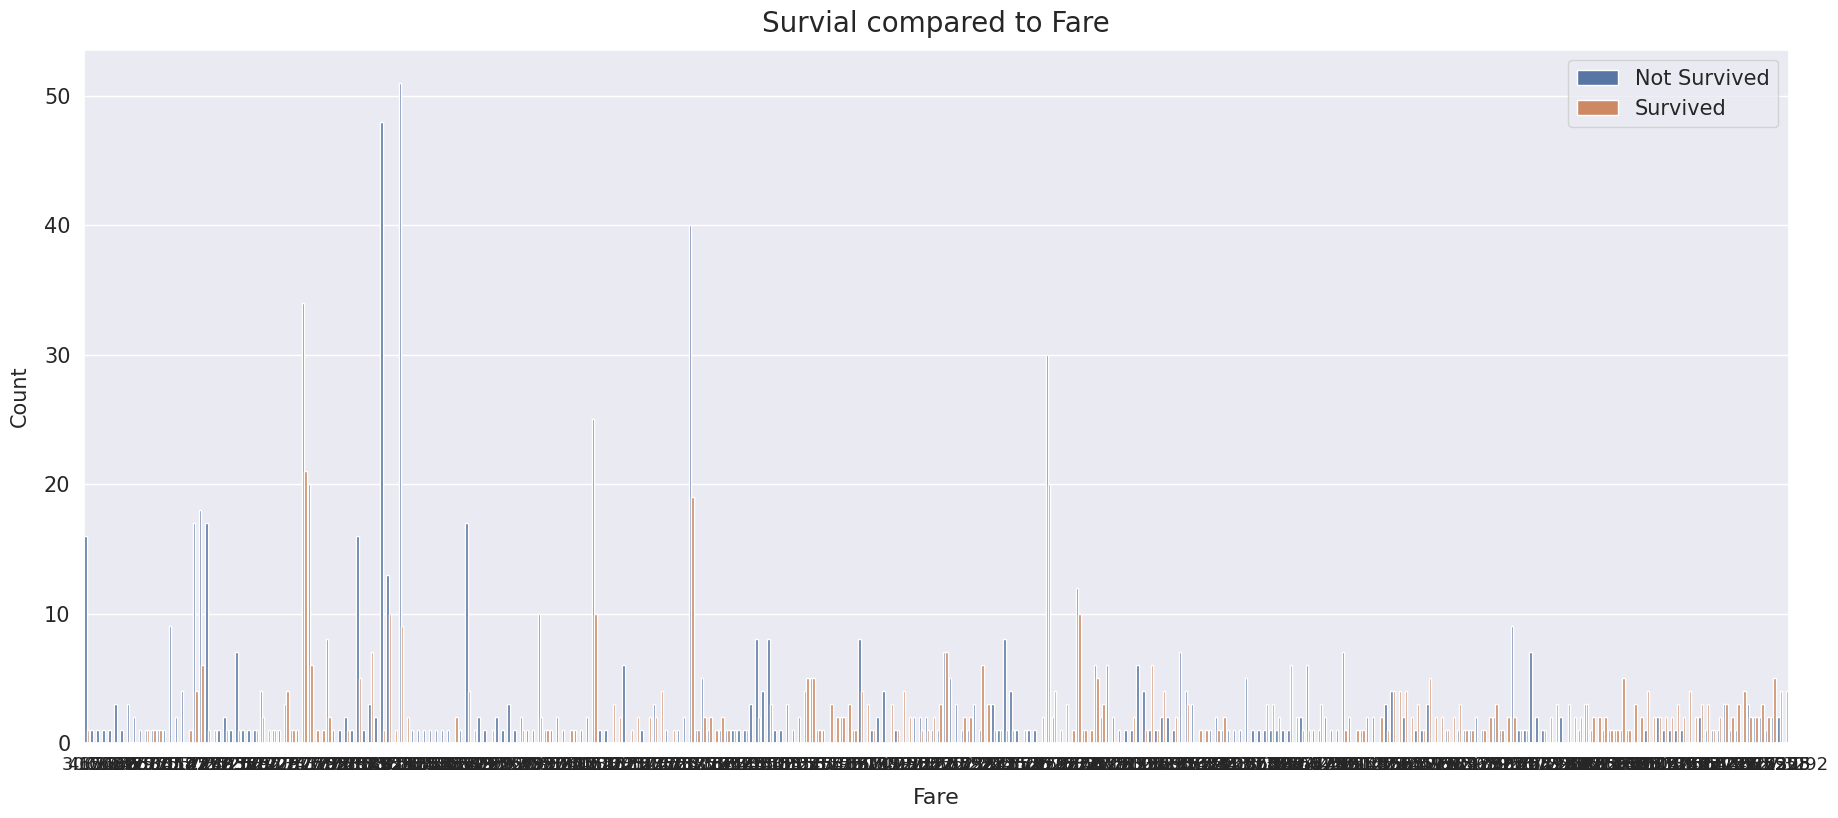

In [ ]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=df)
plt.xlabel('Fare', size=16, labelpad=10)
plt.ylabel('Count', size=15, labelpad=10)
plt.tick_params(axis='x', labelsize=13)
plt.tick_params(axis='y', labelsize=15)
plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survial compared to Fare', size=20, y=1, pad=13)
plt.show()


- The scatter plots visualizes the relationship between age and fare paid for passenger class and survival outcome differentiated by gender. In the scatter plot of age against fare, the survival rate was higher for women than for men and the number of men is greater than women who did not survived in each class. Also female survivors tended to pay higher fares than male survivors, especially in the first class and older passengers tended to pay higher fares. Most passengers paid low fares in the third passenger class. The scatter plot shows that there were more male passengers than female passengers in the third class. The survival rate was higher in passenger class 1 and lower in passenger class 3.

- The next scatter plot compares the age and fare of passengers for sibling or spouse and survival outcome differentiated by gender. From the plot, we can say that passengers with a larger number of sibling or spouse count tended to pay lower fares than either zero or lower number of sibling or spouse. In the non-survivors category, male with either no or one sibling or spouse tended to pay higher fare.

- The plot shows a histogram of the fares paid by passengers. The plot is right skewed and the majority of passengers paid a lower fare. This shows a significant difference in social class among the passengers on the Titanic.

- The last plot shows the count of survival category based on the fare paid. We can say that a higher number of passengers who paid a higher fare survived compared to those who paid a lower fare.

## 3. Data Preprocessing

In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train1 = train_data.copy()

train1.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

train1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
data1 = train1.copy()

data1 = pd.get_dummies(data1)

data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [ ]:
# Code Here (Add as many cells as you need)
print(*data1.columns, sep = ', ')

Survived, Pclass, Age, SibSp, Parch, Fare, Sex_female, Sex_male, Embarked_C, Embarked_Q, Embarked_S


In [ ]:
data1.info()

print('\nOverview about Columns:')
print(data1.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Age         714 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Sex_female  891 non-null    uint8  
 7   Sex_male    891 non-null    uint8  
 8   Embarked_C  891 non-null    uint8  
 9   Embarked_Q  891 non-null    uint8  
 10  Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(5)
memory usage: 46.2 KB

Overview about Columns:
            count       mean        std   min      25%      50%   75%  \
Survived    891.0   0.383838   0.486592  0.00   0.0000   0.0000   1.0   
Pclass      891.0   2.308642   0.836071  1.00   2.0000   3.0000   3.0   
Age         714.0  29.699118  14.526497  0.42  20.1250  2

In [ ]:
r, c = data1.shape
print(f'Rows: {r}')
print(f'Columns: {c}')

Rows: 891
Columns: 11


In [ ]:
print(f'Total cells: {r * c}')

Total cells: 9801


In [ ]:
dup = data1[data1.duplicated()]
print(f'Number of duplicates: {dup.shape[0]}')

Number of duplicates: 111


In [ ]:
data1.drop_duplicates(inplace = True)
data1

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,1,0,0,1,0
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,NaN,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [ ]:
missing_vals = data1.isna().sum()
print(missing_vals.loc[missing_vals > 0])

Age    104
dtype: int64


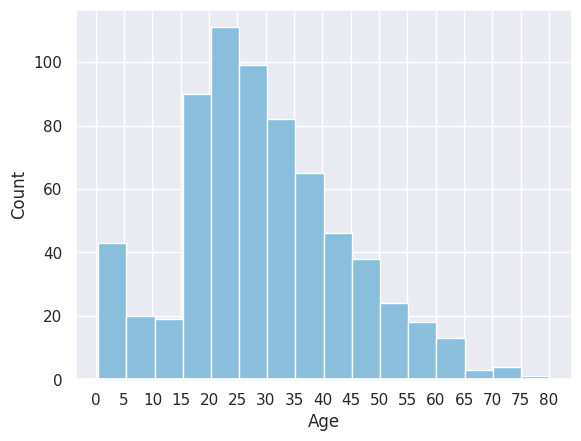

In [ ]:
plt.hist(data1['Age'], bins = 16, color = colors[2])
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(np.arange(0, 85, 5))
plt.show()

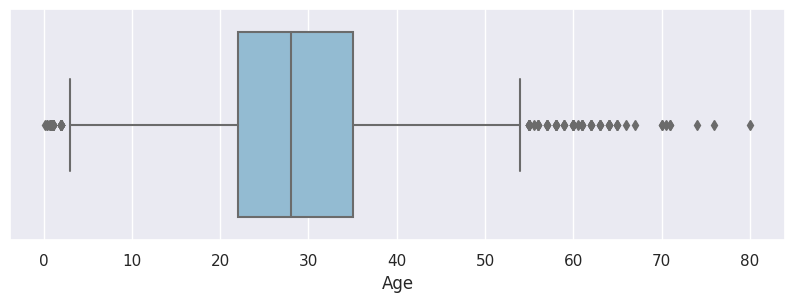

In [ ]:
plt.figure(figsize = (10, 3))
sns.boxplot(x = df['Age'], color = colors[2])
plt.xlabel('Age')
plt.show()

In [ ]:
age_med = data1['Age'].median()
data1['Age'].fillna(age_med, inplace = True)

data1['Age'].isna().sum()

0

In [ ]:
# Creating a new column 'Family_size' by adding 'SibSp' and 'Parch' columns
data1['Family_size'] = data1['SibSp'] + data1['Parch'] + 1
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_size
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,2
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,2
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,2
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,1


In [ ]:
# Creating a new column 'Alone' indicating whether the passenger is alone or not
data1['Alone'] = 0
data1.loc[data1['Family_size'] == 1, 'Alone'] = 1
data1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_size,Alone
0,0,3,22.0,1,0,7.2500,0,1,0,0,1,2,0
1,1,1,38.0,1,0,71.2833,1,0,1,0,0,2,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1,1,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1,2,0
4,0,3,35.0,0,0,8.0500,0,1,0,0,1,1,1


In [ ]:
# Dropping 'SibSp' and 'Parch' columns
data1 = data1.drop(['SibSp', 'Parch'], axis = 1)
data1.head()

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_size,Alone
0,0,3,22.0,7.2500,0,1,0,0,1,2,0
1,1,1,38.0,71.2833,1,0,1,0,0,2,0
2,1,3,26.0,7.9250,1,0,0,0,1,1,1
3,1,1,35.0,53.1000,1,0,0,0,1,2,0
4,0,3,35.0,8.0500,0,1,0,0,1,1,1


In [ ]:
data1['Age'] = data1['Age'].astype('int')

In [ ]:
# Scaling the 'Age' and 'Fare' columns using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1[['Age', 'Fare']] = scaler.fit_transform(data1[['Age', 'Fare']])
data1

,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_size,Alone
0,0,3,-0.550518,-0.528033,0,1,0,0,1,2,0
1,1,1,0.615549,0.697956,1,0,1,0,0,2,0
2,1,3,-0.259001,-0.515109,1,0,0,0,1,1,1
3,1,1,0.396911,0.349817,1,0,0,0,1,2,0
4,0,3,0.396911,-0.512716,0,1,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,0.688428,-0.109211,1,0,0,1,0,6,0
887,1,1,-0.769155,-0.092459,1,0,0,0,1,1,1
888,0,3,-0.113243,-0.217866,1,0,0,0,1,4,0
889,1,1,-0.259001,-0.092459,0,1,1,0,0,1,1


In [ ]:
"""
This code computes the correlation matrix of a DataFrame data1.
The cmap parameter specifies the color map to use
axis=None means that the gradient will be applied to the entire DataFrame.
The set_precision method sets the number to 2 decimal places to use for displaying the correlation values in the output.
"""

corr_matrix = data1.corr()
corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).set_precision(2)

<ipython-input-79-4b70ac93e4bd>:9: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix.style.background_gradient(cmap = 'coolwarm', axis = None).set_precision(2)


,Survived,Pclass,Age,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Family_size,Alone
Survived,1.00,-0.34,-0.08,0.25,0.51,-0.51,0.17,-0.04,-0.14,0.01,-0.18
Pclass,-0.34,1.00,-0.34,-0.55,-0.12,0.12,-0.25,0.21,0.11,0.08,0.11
Age,-0.08,-0.34,1.00,0.09,-0.09,0.09,0.04,-0.03,-0.02,-0.28,0.19
Fare,0.25,-0.55,0.09,1.00,0.17,-0.17,0.28,-0.11,-0.19,0.19,-0.25
Sex_female,0.51,-0.12,-0.09,0.17,1.00,-1.00,0.09,0.04,-0.11,0.19,-0.28
Sex_male,-0.51,0.12,0.09,-0.17,-1.00,1.00,-0.09,-0.04,0.11,-0.19,0.28
Embarked_C,0.17,-0.25,0.04,0.28,0.09,-0.09,1.00,-0.14,-0.81,-0.05,-0.09
Embarked_Q,-0.04,0.21,-0.03,-0.11,0.04,-0.04,-0.14,1.00,-0.46,-0.04,0.08
Embarked_S,-0.14,0.11,-0.02,-0.19,-0.11,0.11,-0.81,-0.46,1.00,0.07,0.03
Family_size,0.01,0.08,-0.28,0.19,0.19,-0.19,-0.05,-0.04,0.07,1.00,-0.71



In this section, we see necessary dataset info for data preprocessing. There are 111 total duplicates and 104 missing values in 'AGE' column. First, we drop the duplicates and replace the missing values in the 'Age' column with median.

For the purpose of preparing the dataset for machine learning, we add two new columns 'Family_size' and 'Alone' to extract more information and improve the performance. One is added with 'SibSp' and 'Parch' which is the total number of family members and another column represents if a passenger is alone or not. Now we drop the 'SibSp' and 'Parch'.

We scale the Age and Fare columns using StandardScaler. Scaling is used for standardize the range of features or variables in the dataset to a common scale, which makes it easier for certain machine learning algorithms to operate on the data.

Then we find the correlation between the colmuns. The higest positive correlation is in between Survived and Sex_female with a number of 0.51. This suggests that there is a moderate positive relationship between female and survival outcome in the Titanic disaster.